# Image Classifier using CNN

currency_-sixteen_nine.avif

* Check if colab has assigned GPU

In [ ]:
!nvidia-smi

Sat Jan 28 01:30:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

* use Uqq to update any package

In [ ]:
!pip install -Uqq fastai

In [ ]:
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


* **duckduckgo_search is used to search images**
* **term - item we wanna search for**
* **max_images - max images to search**

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images):
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

# search_images function will return url's which should be further downloaded using fastdownload package

In [ ]:
from fastdownload import download_url

url = search_images('American currency photos', 1)
url
download_url(url[0], 'dollars.jpg', show_progress=False)

Path('dollars.jpg')

* Now view the downloaded image using fastai.vision

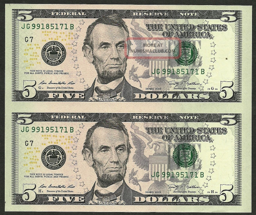

In [ ]:
from fastai.vision.all import *

Image.open('dollars.jpg').to_thumb(256,256)

#to_thumb is used to resize to 256x256 size


* Similarly let's download indian currency

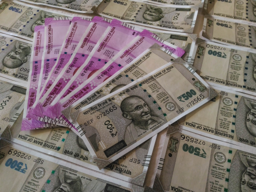

In [ ]:
url = search_images('Indian Currency Photos', 1)
download_url(url[0], 'rupees.jpg', show_progress=False)
Image.open('rupees.jpg').to_thumb(256, 256)

**Now let's download 300 images of indian and american currency(including notes and coins)**

In [ ]:
from time import sleep

searches = ['dollar', 'rupee']
path = Path('dollar_or_ruppee')

for item in searches:
  dest = path/item
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{item} photo', 300))
  sleep(20)
  resize_images(path/item, max_size=400, dest=path/item)


/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Lets remove the images which are not downloaded correctly

In [ ]:
verify_images(get_image_files(path)).map(Path.unlink)

(#23) [None,None,None,None,None,None,None,None,None,None...]

# Time to Split the images data and Train our Model

* **DataLoaders object contains training and validation data sets to train our model**

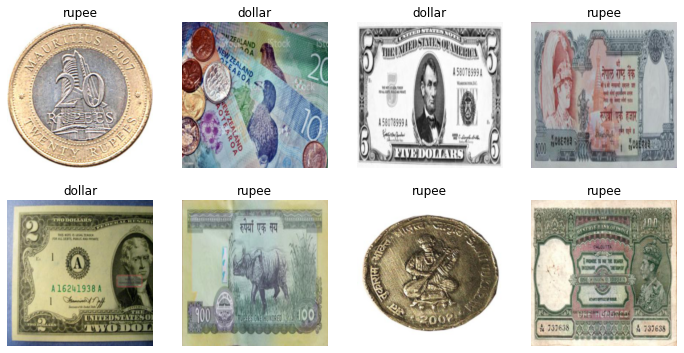

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),    # Input is image and output is a category(DOLLAR OR RUPEE)
    get_items = get_image_files,              # get_image_files will return a list of all images in specified path
    splitter = RandomSplitter(valid_pct = 0.2, seed = 123),   # 20% validation set and 80% training set
    get_y = parent_label,                                     # y = dollar, rupee
    item_tfms = [Resize(256, method='squish')]                # Squish the images before training 
).dataloaders(path)

dls.show_batch(max_n=8)

* Let's use **resnet18**, a fastest computer vision model.

In [ ]:
model = vision_learner(dls, resnet18)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
#fine_tuning is done to a pretrained model to adjust the weights a bit so that the model can recognize our dataset.

model.fine_tune(2)

epoch,train_loss,valid_loss,time
0,1.117627,0.554772,00:09


epoch,train_loss,valid_loss,time
0,0.448230,0.351060,00:03
1,0.310163,0.285337,00:03


# Its time to predict

rupee


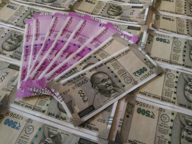

In [ ]:
is_what = model.predict('rupees.jpg')
print(is_what[0])
Image.open('rupees.jpg').to_thumb(192, 192)